In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data=pd.read_csv("mexico_real_estate_clean.csv")

In [3]:
data.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [5]:
data["property_type"].value_counts()

property_type
house        1329
apartment     407
Name: count, dtype: int64

In [6]:
data["state"].value_counts().head(10)


state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

In [7]:
data["state"].value_counts().nunique()


26

In [8]:
data[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


In [9]:
bins=list(range(50,401,50))
binned=pd.cut(data["area_m2"], bins=bins)
counts=binned.value_counts().sort_index()
print(counts)


area_m2
(50, 100]     429
(100, 150]    415
(150, 200]    380
(200, 250]    215
(250, 300]    163
(300, 350]     96
(350, 400]     38
Name: count, dtype: int64


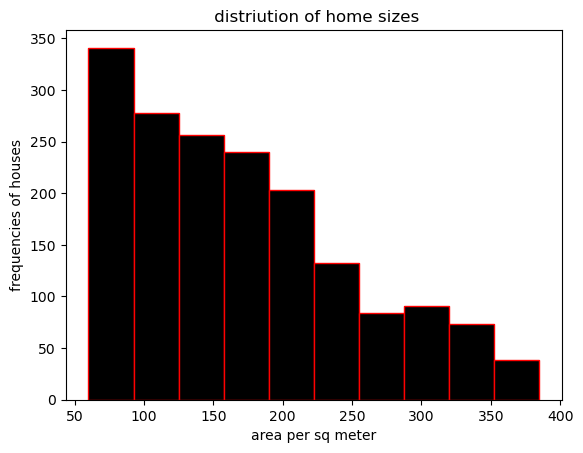

In [10]:
plt.hist(data["area_m2"],edgecolor="red",color="black")
plt.xlabel("area per sq meter")
plt.ylabel("frequencies of houses")
plt.title(" distriution of home sizes")
plt.show()

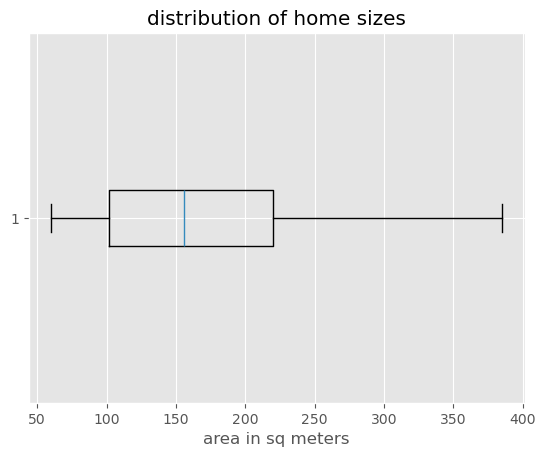

In [11]:
plt.style.use("ggplot")
plt.boxplot(data["area_m2"],vert=False)
plt.xlabel("area in sq meters")
plt.title("distribution of home sizes")
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


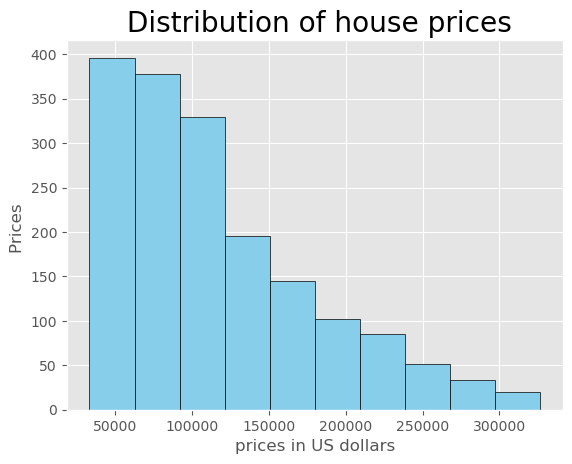

In [17]:
plt.hist(data["price_usd"],color="skyblue",edgecolor="black")
plt.style.use("fivethirtyeight")
plt.xlabel("prices in US dollars")
plt.ylabel("Prices ")
plt.title(" Distribution of house prices")
plt.show()

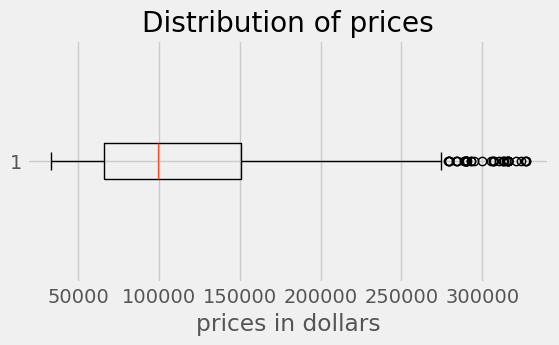

In [23]:
plt.figure(figsize=(6,3))
plt.boxplot(data["price_usd"],vert=False)
plt.xlabel("prices in dollars")
plt.title("Distribution of prices")
plt.show()

In [33]:
data.state.value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

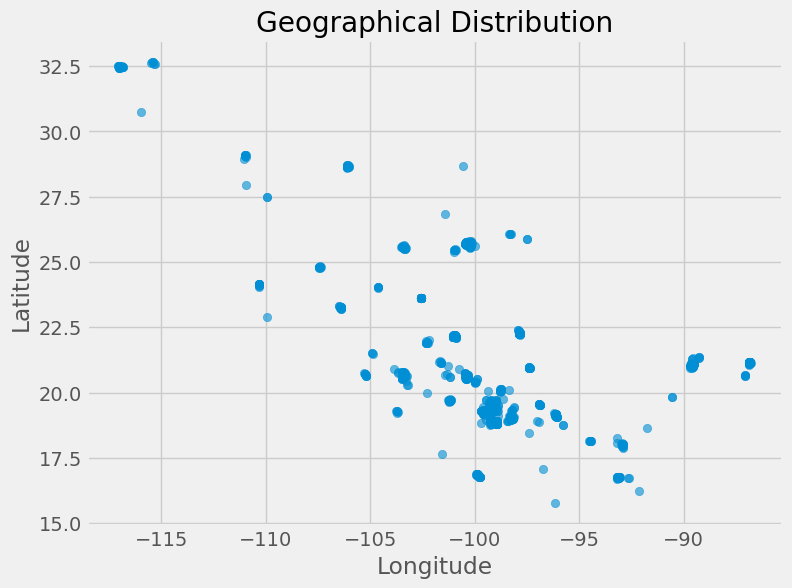

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(data["lon"], data["lat"], alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution")
plt.show()


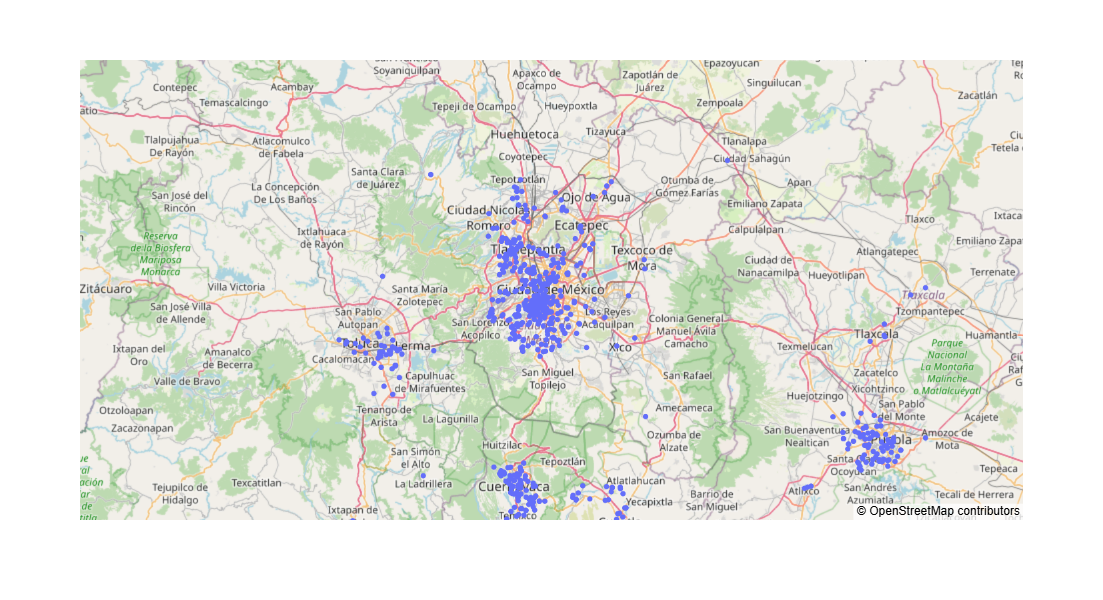

In [52]:
fig=px.scatter_mapbox(data,
    
    lat="lat",
    lon="lon",
    center={"lat":19.43,"lon":-99.13},
    width=600,
    height=600,
    hover_data=["price_usd"],
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

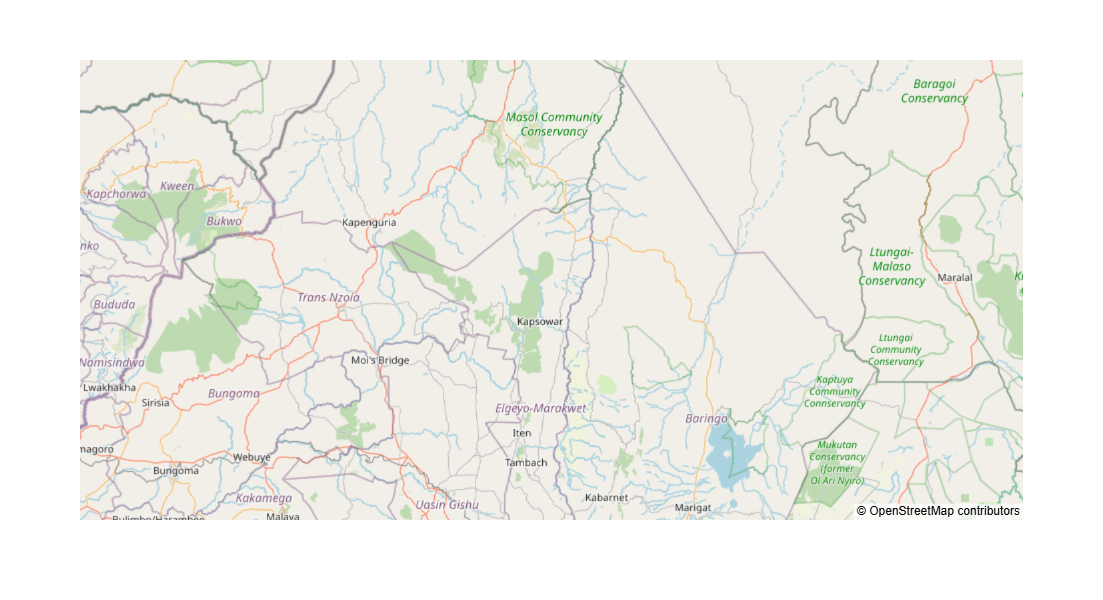

In [43]:
fig=px.scatter_mapbox(data,
     lat="lat",
     lon="lon",
     width=600,
     height=600,
     center={"lat":1.0656,"lon":35.591},
     hover_data=["price_usd"],
)


fig.update_layout(mapbox_style="open-street-map")
fig.show()

Which state has the most expensive real estate market?


In [58]:
mean_price_by_state=data.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB
